# Laboratory work 10 
           by Lebedeva Yekaterina IT2-2110

# 1. Importing packages

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# 2. Data loading

In [114]:
data = pd.read_csv('Data_lab10.csv')
data

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,Neighborhood,HouseStyle,OverallQual,...,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,PoolArea,SaleCondition,SalePrice
0,60.0,RL,8450.0,Pave,Reg,NaN,AllPub,CollgCr,NaN,NaN,...,Ex,Y,SBrkr,856,854,3,1,0,Normal,208500
1,20.0,RL,9600.0,NaN,Reg,NaN,AllPub,Veenker,1Story,6.0,...,Ex,Y,SBrkr,1262,0,3,1,0,Normal,181500
2,60.0,RL,11250.0,Pavement,IR1,Lvl,AllPub,CollgCr,2Story,7.0,...,Ex,Y,SBrkr,920,866,3,1,0,Normal,223500
3,70.0,RL,9550.0,Pavement,IR1,NaN,AllPub,Crawfor,2Story,NaN,...,Gd,Y,SBrkr,961,756,3,1,0,Abnorml,140000
4,60.0,RL,14260.0,NaN,IR1,Lvl,AllPub,NoRidge,2Story,8.0,...,Ex,Y,SBrkr,1145,1053,4,1,0,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,RL,7917.0,Pave,Reg,Lvl,AllPub,Gilbert,2Story,6.0,...,Ex,Y,SBrkr,953,694,3,1,0,Normal,175000
1456,20.0,RL,13175.0,Pave,Reg,Lvl,AllPub,NWAmes,1Story,6.0,...,TA,Y,SBrkr,2073,0,3,1,0,Normal,210000
1457,70.0,RL,9042.0,Pave,Reg,Lvl,AllPub,Crawfor,2Story,7.0,...,Ex,Y,SBrkr,1188,1152,4,1,0,Normal,266500
1458,20.0,RL,9717.0,Pave,Reg,Lvl,AllPub,NAmes,1Story,5.0,...,Gd,Y,FuseA,1078,0,2,1,0,Normal,142125


# 3. First look at data

In [115]:
print(data.head())

   MSSubClass MSZoning  LotArea    Street LotShape LandContour Utilities  \
0        60.0       RL   8450.0      Pave      Reg         NaN    AllPub   
1        20.0       RL   9600.0       NaN      Reg         NaN    AllPub   
2        60.0       RL  11250.0  Pavement      IR1         Lvl    AllPub   
3        70.0       RL   9550.0  Pavement      IR1         NaN    AllPub   
4        60.0       RL  14260.0       NaN      IR1         Lvl    AllPub   

  Neighborhood HouseStyle  OverallQual  ...  HeatingQC  CentralAir  \
0      CollgCr        NaN          NaN  ...         Ex           Y   
1      Veenker     1Story          6.0  ...         Ex           Y   
2      CollgCr     2Story          7.0  ...         Ex           Y   
3      Crawfor     2Story          NaN  ...         Gd           Y   
4      NoRidge     2Story          8.0  ...         Ex           Y   

   Electrical 1stFlrSF 2ndFlrSF BedroomAbvGr KitchenAbvGr  PoolArea  \
0       SBrkr      856      854            3       

In [116]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1348 non-null   float64
 1   MSZoning       1359 non-null   object 
 2   LotArea        1338 non-null   float64
 3   Street         879 non-null    object 
 4   LotShape       1341 non-null   object 
 5   LandContour    1001 non-null   object 
 6   Utilities      1359 non-null   object 
 7   Neighborhood   1334 non-null   object 
 8   HouseStyle     1338 non-null   object 
 9   OverallQual    1353 non-null   float64
 10  OverallCond    1366 non-null   float64
 11  YearBuilt      1337 non-null   float64
 12  YearRemodAdd   1351 non-null   float64
 13  RoofStyle      1328 non-null   object 
 14  RoofMatl       1354 non-null   object 
 15  ExterQual      1350 non-null   object 
 16  Foundation     1310 non-null   object 
 17  TotalBsmtSF    1356 non-null   float64
 18  Heating 

In [117]:
print(data.describe())

        MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1348.000000    1338.000000  1353.000000  1366.000000  1337.000000   
mean     56.509644   10401.521674     6.090909     5.567350  1966.602842   
std      42.329644    8564.200675     1.388834     1.114442    73.775027   
min      20.000000    1300.000000     1.000000     1.000000   925.000000   
25%      20.000000    7590.000000     5.000000     5.000000  1954.000000   
50%      50.000000    9475.000000     6.000000     5.000000  1972.000000   
75%      70.000000   11600.000000     7.000000     6.000000  2000.000000   
max     190.000000  164660.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   TotalBsmtSF     1stFlrSF     2ndFlrSF  BedroomAbvGr  \
count   1351.000000  1.356000e+03  1460.000000  1460.000000   1460.000000   
mean    1984.929682  2.184915e+04  1162.626712   346.992466      2.866438   
std       20.647524  3.998092e+05   386.587738   436.528436      0.815778   
min    

In [118]:
print(data['MSZoning'].unique())

['RL' 'RM' 'C (all)' nan 'FV' 'RH']


In [119]:
print(data['SalePrice'].value_counts())

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64


# 4. Data cleaning

 Handling missing values

In [120]:
data.dropna(inplace=True)

Validation consistency, Check for duplicates

In [121]:
data.duplicated().sum()

0

Preparation

In [123]:
cat = ['MSZoning', 'Street', 'LotShape', 'LandContour','Utilities','Neighborhood','HouseStyle','RoofStyle','RoofMatl','ExterQual','Foundation','HeatingQC','Heating','CentralAir','Electrical','SaleCondition']

In [124]:
data[cat] = data[cat].astype('object')

In [125]:
print(data[cat].dtypes)

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
Neighborhood     object
HouseStyle       object
RoofStyle        object
RoofMatl         object
ExterQual        object
Foundation       object
HeatingQC        object
Heating          object
CentralAir       object
Electrical       object
SaleCondition    object
dtype: object


In [126]:
from sklearn import preprocessing

for column in cat:
    data[column] = data[column].str.strip()
    encoder = preprocessing.LabelEncoder()
    data[column] = encoder.fit_transform(data[column])

In [127]:
data

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,Neighborhood,HouseStyle,OverallQual,...,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,PoolArea,SaleCondition,SalePrice
2,60.0,3,11250.0,2,0,3,0,4,5,7.0,...,0,1,3,920,866,3,1,0,3,223500
10,20.0,3,11200.0,1,2,3,0,18,2,5.0,...,0,1,3,1040,0,3,1,0,3,129500
11,60.0,3,11924.0,2,0,3,0,15,5,9.0,...,0,1,3,1182,1142,4,1,0,4,345000
16,20.0,3,11241.0,1,0,3,0,11,2,6.0,...,0,1,3,1004,0,2,1,0,3,149000
17,90.0,3,10791.0,2,2,3,0,18,2,4.0,...,3,1,3,1296,0,2,2,0,3,90000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,3,7917.0,1,2,3,0,7,5,6.0,...,0,1,3,953,694,3,1,0,3,175000
1456,20.0,3,13175.0,1,2,3,0,13,2,6.0,...,3,1,3,2073,0,3,1,0,3,210000
1457,70.0,3,9042.0,1,2,3,0,5,5,7.0,...,0,1,3,1188,1152,4,1,0,3,266500
1458,20.0,3,9717.0,1,2,3,0,11,2,5.0,...,2,1,0,1078,0,2,1,0,3,142125


In [128]:
num = ['MSSubClass', 'LotArea','OverallQual', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'PoolArea', 'SalePrice']

<Axes: >

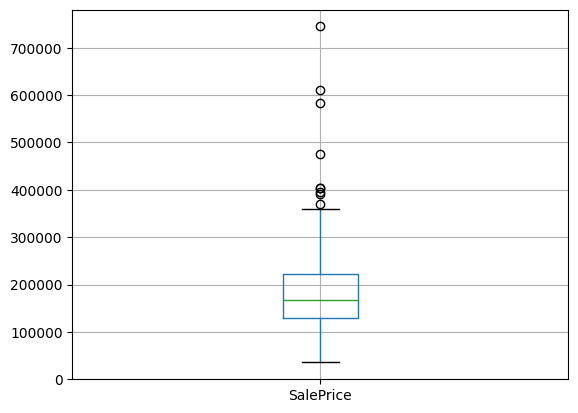

In [129]:
data[['SalePrice']].boxplot()

<Axes: >

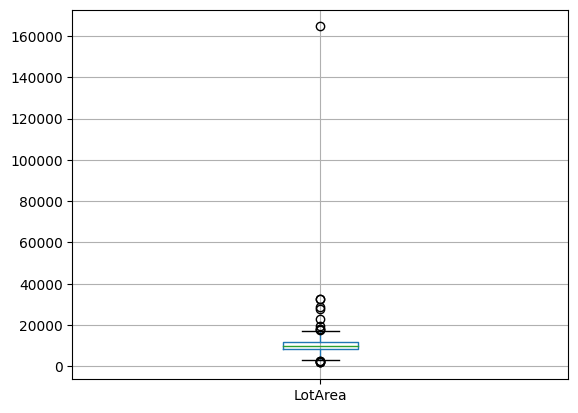

In [130]:
data[['LotArea']].boxplot()

In [131]:
data.loc[data.LotArea > 40000, 'LotArea'] = np.nan

In [132]:
data.dropna(inplace=True)

# 5. Data analysis

Visualizing relationship between columns

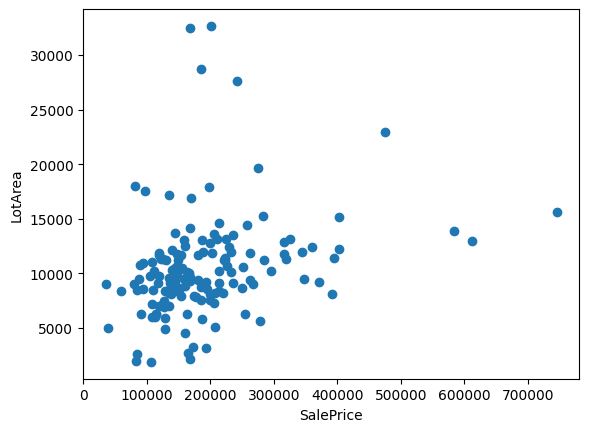

In [133]:
plt.scatter(data['SalePrice'], data['LotArea'])
plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.show()

 Investigating relationships between columns

In [134]:
data.groupby('LotArea')['SalePrice'].mean()

LotArea
1869.0     106000.0
1953.0      83000.0
2117.0     168500.0
2592.0      85000.0
2651.0     165000.0
             ...   
22950.0    475000.0
27650.0    242000.0
28698.0    185000.0
32463.0    168000.0
32668.0    200624.0
Name: SalePrice, Length: 140, dtype: float64

# 6. Data division in train test sets

In [135]:
X = data.drop('LotArea', axis=1)
y = data['LotArea']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. Model training

Linear Regression

In [136]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

 Decision tree regression

In [137]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

# 8. Model improvement

 Linear regression model improvement using cross-validation

In [138]:
lr_scores = cross_val_score(lr_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
lr_rmse_scores = np.sqrt(-lr_scores)

In [139]:
print('Linear Regression Scores:', lr_rmse_scores)
print('Linear Regression Mean:', lr_rmse_scores.mean())
print('Linear Regression Std Deviation:', lr_rmse_scores.std())

Linear Regression Scores: [ 4123.84324924  1789.9696449   4932.97821382  3236.70272471
  3654.71270033  2409.15141747  2820.7073657   4303.46996319
  3457.64555754 21828.68388321]
Linear Regression Mean: 5255.786472012505
Linear Regression Std Deviation: 5593.492744092252


Decision tree regression model improvement using cross-validation

In [140]:
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
dt_rmse_scores = np.sqrt(-dt_scores)

In [141]:
print('Decision Tree Regression Scores:', dt_rmse_scores)
print('Decision Tree Regression Mean:', dt_rmse_scores.mean())
print('Decision Tree Regression Std Deviation:', dt_rmse_scores.std())

Decision Tree Regression Scores: [2534.88425413 3744.15506915 7134.66247529 4754.01046008 4457.58846341
 1922.87630198 3148.6018802  6949.29151065 5775.31973141 6784.77527262]
Decision Tree Regression Mean: 4720.616541891823
Decision Tree Regression Std Deviation: 1796.3168451177112


# 9. Conclusion

In this project, I analyzed a dataset and prepared it for modeling by handling missing values, outliers. I also performed data analysis to gain insights from the data. I split the data into train and test sets and trained two models, linear regression and decision tree regression, to predict a target variable. I used cross-validation to improve the models and measure their performance. Overall, this project helped me gain practical experience in data cleaning, data analysis, and model training.

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 2 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     152 non-null    float64
 1   MSZoning       152 non-null    int32  
 2   LotArea        152 non-null    float64
 3   Street         152 non-null    int32  
 4   LotShape       152 non-null    int32  
 5   LandContour    152 non-null    int32  
 6   Utilities      152 non-null    int32  
 7   Neighborhood   152 non-null    int32  
 8   HouseStyle     152 non-null    int32  
 9   OverallQual    152 non-null    float64
 10  OverallCond    152 non-null    float64
 11  YearBuilt      152 non-null    float64
 12  YearRemodAdd   152 non-null    float64
 13  RoofStyle      152 non-null    int32  
 14  RoofMatl       152 non-null    int32  
 15  ExterQual      152 non-null    int32  
 16  Foundation     152 non-null    int32  
 17  TotalBsmtSF    152 non-null    float64
 18  Heating  

In [149]:
missing_values = data.isnull().sum()
print('\nMissing Values:')
print(missing_values)


Missing Values:
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
Neighborhood     0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
ExterQual        0
Foundation       0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
BedroomAbvGr     0
KitchenAbvGr     0
PoolArea         0
SaleCondition    0
SalePrice        0
dtype: int64


In [150]:
print('\nUnique Values:')
print(unique_values)


Unique Values:
MSSubClass        13
MSZoning           5
LotArea          140
Street             3
LotShape           3
LandContour        4
Utilities          1
Neighborhood      23
HouseStyle         8
OverallQual       10
OverallCond        8
YearBuilt         68
YearRemodAdd      48
RoofStyle          3
RoofMatl           3
ExterQual          4
Foundation         5
TotalBsmtSF      132
Heating            2
HeatingQC          4
CentralAir         2
Electrical         4
1stFlrSF         140
2ndFlrSF          57
BedroomAbvGr       5
KitchenAbvGr       2
PoolArea           3
SaleCondition      5
SalePrice        128
dtype: int64


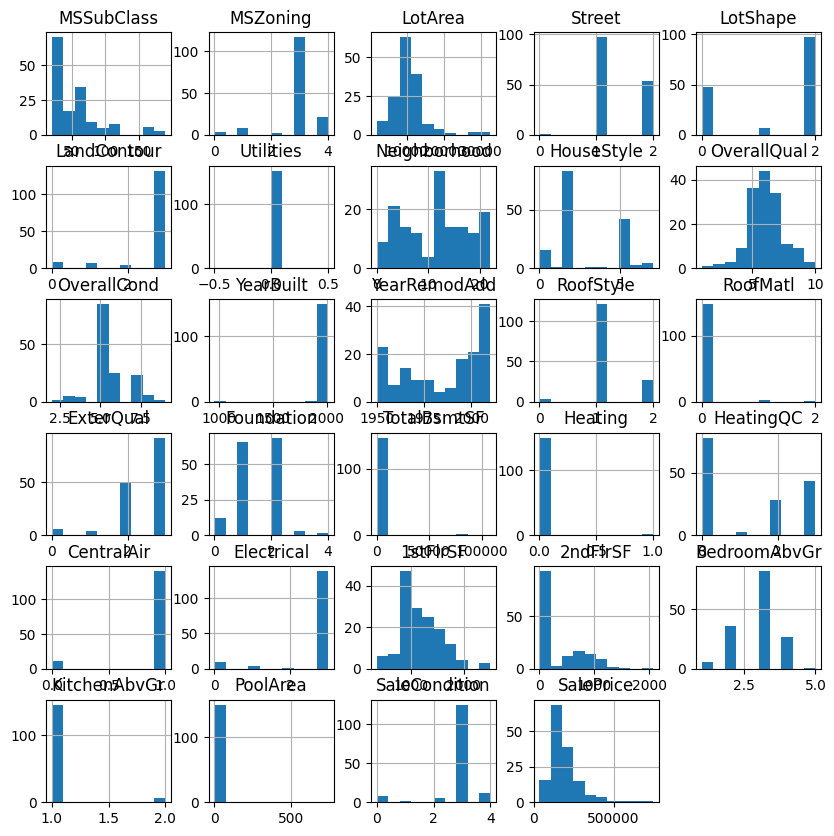

In [151]:
import matplotlib.pyplot as plt

data.hist(bins=10, figsize=(10,10))
plt.show()